#import necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

#Load the train and test dataset

In [2]:
data_1 = pd.read_csv('train.csv')
data_1.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [3]:
data_2 = pd.read_csv('test.csv')
data_2.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


#create random number generator

In [4]:
seed = 42
rng = np.random.RandomState(seed)

#distribution of classes in the dataset

In [5]:
data_1['class'].value_counts()

class
1    6174
0    6022
Name: count, dtype: int64

#load images and store it in numpy array

In [6]:
# empty list to store the images
X = []
# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values
#y = data_1.class.values

#shape of the image

In [7]:
X.shape

(12196, 224, 224, 3)

#visualizing images

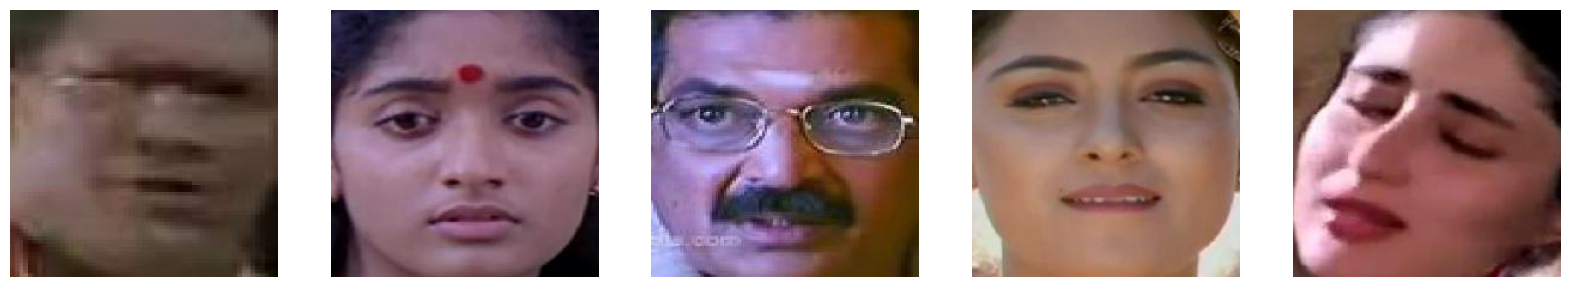

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

#Pre-processing the dat

#converting 3 dimensional image to 1 dimensional image

In [9]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

#minimum and maximum pixel values of images

In [10]:
X.min(), X.max()

(0, 255)

#minimum and maximum pixel values of images after normalizing

In [11]:
X.min(), X.max()

(0, 255)

#Creating training and validation set

#Creating a training and validation set

In [12]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

#Shape of training and validation set

In [13]:
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

#Defining the model architecture

#Defining the architecture of the model

In [14]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Summary of the model

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model

In [16]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Training the model

In [17]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.4947 - loss: 0.7129 - val_accuracy: 0.5165 - val_loss: 0.6931
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.5034 - loss: 0.6934 - val_accuracy: 0.4840 - val_loss: 0.6937
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.5144 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6927
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.5060 - loss: 0.6935 - val_accuracy: 0.4843 - val_loss: 0.6933
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.4944 - loss: 0.6936 - val_accuracy: 0.5157 - val_loss: 0.6927
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.5003 - loss: 0.6934 - val_accuracy: 0.4843 - val_loss: 0.6935
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.4981 - loss: 0.6934 - val_accuracy: 0

#Evaluating model performance

#Getting predictions in the form of class as well as probabilities

In [24]:
predictions_probabilities = model.predict(X_valid)
predictions = predictions_probabilities.argmax(axis=1)

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


#Accuracy on validation set

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.4842853238589779 %


#Summarize history for loss

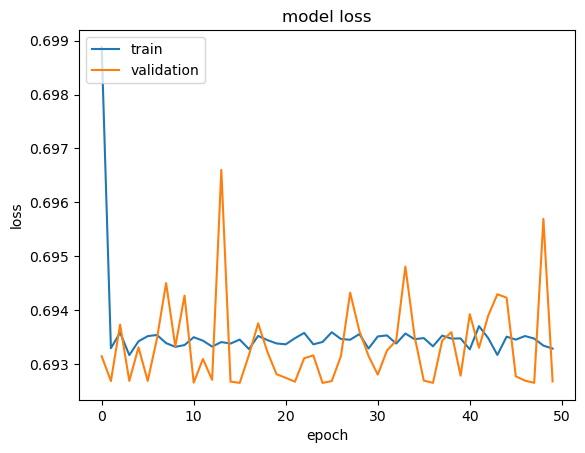

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Summarize history for accuracy

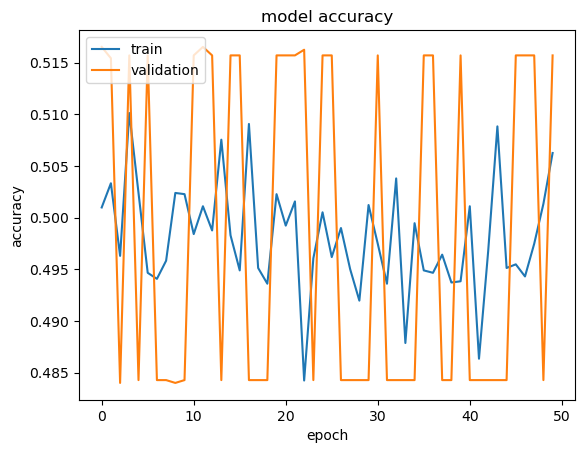

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 51 % sure that it is female
And actual class is  0


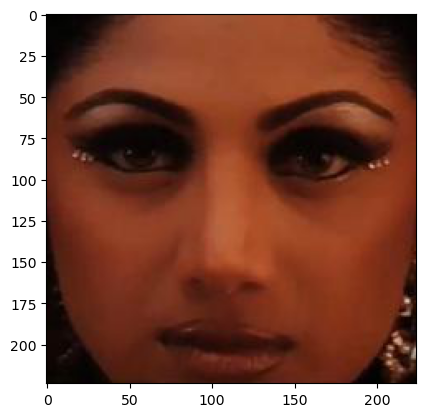

In [29]:
# pull out the original images from the data which correspond to the validation data
_, valid_Gender, _, valid_y = train_test_split(data_1.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_Gender)))

# get the corresponding image name and probability
img_name = valid_Gender[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is female')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

#Changing activation function of hidden layer

#Using relu as activation function in hidden layer

In [30]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Compiling the model

In [31]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Summary of the model

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#Training the model for 50 epochs

In [34]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.5046 - loss: 2895542.5000 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.5004 - loss: 0.6928 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.5090 - loss: 0.6929 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.4962 - loss: 0.6930 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5096 - loss: 0.6930 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.5034 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.4941 - loss: 0.6932 - val_accu

#Accuracy on validation set

In [38]:
import numpy as np

raw_predictions = model.predict(X_valid)
predicted_classes = np.argmax(raw_predictions, axis=1)

accuracy = np.mean(predicted_classes == y_valid)
print('Accuracy on validation set:', accuracy, '%')

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Accuracy on validation set: 0.4842853238589779 %


#Summarize history for loss

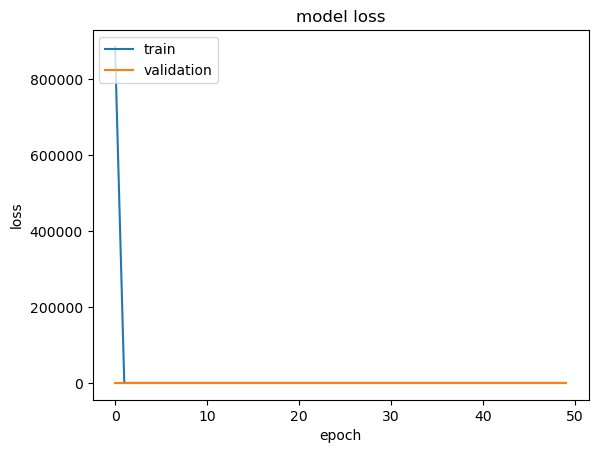

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Increase hidden neurons

In [40]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Compiling the model

In [41]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Model summary

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │     154,141,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,142,721 (588.01 MB)

 Trainable params: 154,142,721 (588.01 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 65s 948ms/step - accuracy: 0.4931 - loss: 0.8797 - val_accuracy: 0.5160 - val_loss: 0.6916
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4887 - loss: 0.7018 - val_accuracy: 0.5160 - val_loss: 0.6980
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 65s 967ms/step - accuracy: 0.5026 - loss: 0.7000 - val_accuracy: 0.4843 - val_loss: 0.7330
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 64s 950ms/step - accuracy: 0.5124 - loss: 0.6965 - val_accuracy: 0.5157 - val_loss: 0.7189
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 63s 943ms/step - accuracy: 0.5047 - loss: 0.6975 - val_accuracy: 0.4846 - val_loss: 0.6964
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 64s 950ms/step - accuracy: 0.5029 - loss: 0.6980 - val_accuracy: 0.5146 - val_loss: 0.6927
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 65s 965ms/step - accuracy: 0.5098 - loss: 0.7006 - val_accuracy: 0.5160 - val_loss: 0.6942
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 63s 941ms/step - accuracy: 0.4933 - loss: 0.6983 - val_accurac

#Accuracy on validation set

In [44]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_probabilities = model.predict(X_valid)
y_pred_classes =np.argmax(y_pred_probabilities, axis=1)
accuracy = accuracy_score(y_valid, y_pred_classes)
print('Accuracy on validation set:', accuracy, '%')

115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step
Accuracy on validation set: 0.4842853238589779 %


#Summarize history for loss

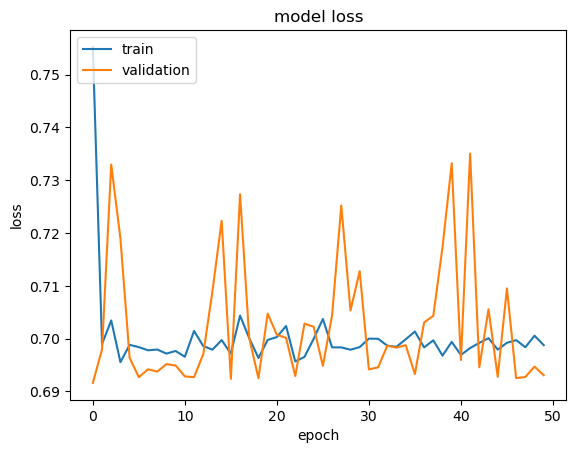

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Increasing hidden layers

In [46]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Compiling the model

In [47]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Model summary

In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.5087 - loss: 0.6936 - val_accuracy: 0.5146 - val_loss: 0.6930
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.4948 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6925
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.4976 - loss: 0.6937 - val_accuracy: 0.4846 - val_loss: 0.6928
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.5211 - loss: 0.6926 - val_accuracy: 0.4846 - val_loss: 0.6935
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.5068 - loss: 0.6928 - val_accuracy: 0.5157 - val_loss: 0.6924
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.5044 - loss: 0.6933 - val_accuracy: 0.6622 - val_loss: 0.6921
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.5410 - loss: 0.6925 - val_accuracy: 0.4846 - val_loss: 0.6932
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.5140 - loss: 0.6926 - val_accuracy: 0.5

#ccuracy on validation set

In [53]:
from sklearn.metrics import accuracy_score
import numpy as np

predictions = model.predict(X_valid)
binary_predictions = np.where(predictions >= 0.5, 1, 0)
accuracy = accuracy_score(y_valid, binary_predictions)
print('Accuracy on validation set:', accuracy)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy on validation set: 0.485378518720962


#Summarize history for loss

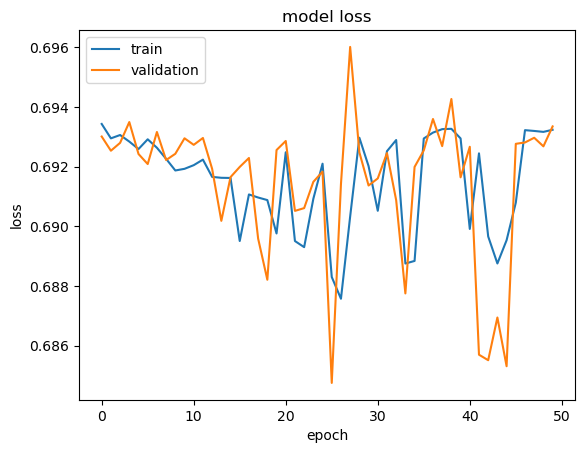

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Increase number of epochs

In [55]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Model summary

In [56]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.4977 - loss: 0.7027 - val_accuracy: 0.5154 - val_loss: 0.6926
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.5032 - loss: 0.6934 - val_accuracy: 0.5154 - val_loss: 0.6928
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.4904 - loss: 0.6941 - val_accuracy: 0.5160 - val_loss: 0.6926
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4837 - loss: 0.6940 - val_accuracy: 0.4867 - val_loss: 0.6931
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.4948 - loss: 0.6937 - val_accuracy: 0.4851 - val_loss: 0.6934
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.5103 - loss: 0.6932 - val_accuracy: 0.4851 - val_loss: 0.6934
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4901 - loss: 0.6936 - val_accuracy: 0.5154 - val_loss: 0.6928
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.4902 - loss: 0.6939 - val_accurac

#Accuracy on validation set

In [59]:
from sklearn.metrics import accuracy_score


predictions = model.predict(X_valid)


binary_predictions = (predictions >= 0.5).astype(int)


accuracy = accuracy_score(y_valid, binary_predictions)

print('Accuracy on validation set:', accuracy)

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Accuracy on validation set: 0.48510522000546596


#Summarize history for loss

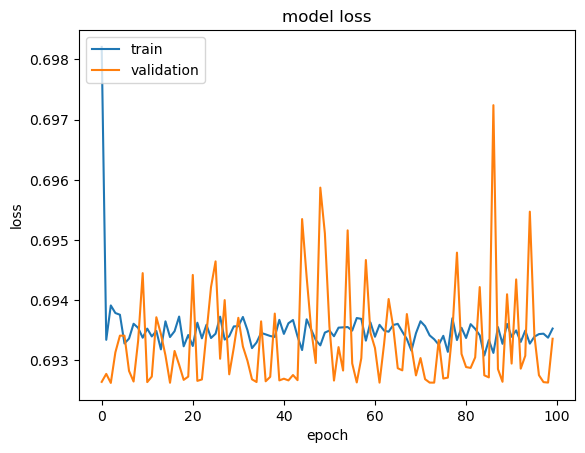

In [60]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Changing the optimizer

#Importing adam optimizer from keras optimizer module 

In [61]:
from keras.optimizers import Adam

#Defining the adam optimizer and setting the learning rate as 10^-5

In [63]:
adam = adam = Adam(learning_rate=1e-5)

#Change optimizer

In [64]:
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\E2082\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Model summary

In [65]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6916
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.5086 - loss: 0.6920 - val_accuracy: 0.5154 - val_loss: 0.6911
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.4988 - loss: 0.6925 - val_accuracy: 0.5223 - val_loss: 0.6925
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.5404 - loss: 0.6922 - val_accuracy: 0.5422 - val_loss: 0.6920
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.6014 - loss: 0.6907 - val_accuracy: 0.5860 - val_loss: 0.6909
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.6152 - loss: 0.6902 - val_accuracy: 0.5739 - val_loss: 0.6912
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.5287 - loss: 0.6925 - val_accuracy: 0.4876 - val_loss: 0.6932
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - accuracy: 0.5086 - loss: 0.6929 - 

#Accuracy on validation set

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

#Summarize history for loss

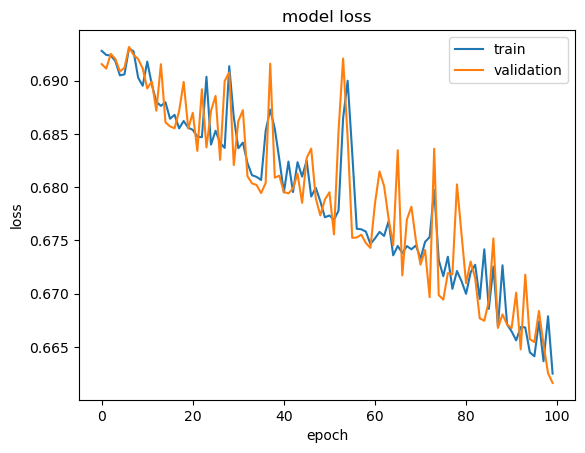

In [67]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#Summarize history for accuracy

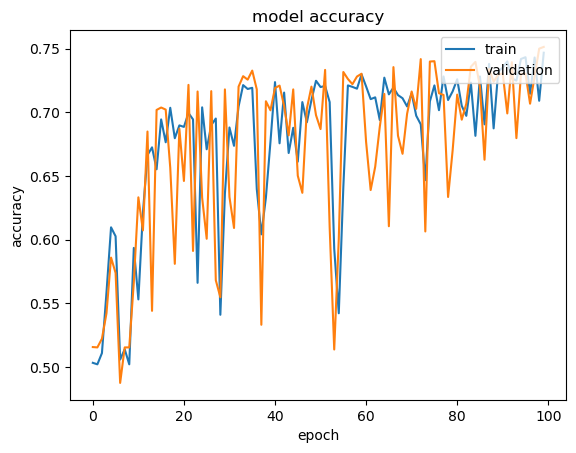

In [68]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()